In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot

In [4]:
def load_data(df, sequence_length=10, split=0.8):
    data_all = np.array(df).astype(float)    # 轉為浮點型別矩陣
    #print(data_all.shape) # (241,1)
    scaler = MinMaxScaler() #數據標準化
    data_all = scaler.fit_transform(data_all)  # 將數據縮放為 0~1 之間
    data = []
    # data 資料共有 (245-10-1)=234 筆
    for i in range(len(data_all) - sequence_length - 1):
        # 每筆 data 資料有 11 欄
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')

    x = reshaped_data[:, :-1] # 第 1至第10個欄位為 特徵
    y = reshaped_data[:, -1]  # 第 11個欄位為 label
    #print(x.shape,y.shape) # (230,10,1) (230,1)
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary] # 前 80% 為 train 的特徵
    test_x = x[split_boundary:]   # 最後 20% 為 test 的特徵
 
    train_y = y[: split_boundary] # 前 80% 為 train 的 label
    test_y = y[split_boundary:]   # 最後 20% 為 test 的 label

    return train_x, train_y, test_x, test_y, scaler, x, y, reshaped_data

def build_model():
    model = Sequential()     
    # 隱藏層：256 個神經元，input_shape：(10,1)
    # TIME_STEPS=10,INPUT_SIZE=1
    model.add(LSTM(input_shape=(10,1),units=256,unroll=False))
    model.add(Dense(units=1)) # 輸出層：1 個神經元
    #compile:loss, optimizer, metrics
    model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
    return model

def train_model(train_x, train_y, test_x, test_y):
    model = build_model()
    try:
        model.fit(train_x, train_y, batch_size=100, epochs=300, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, )) #轉換為1維矩陣
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    return predict, test_y #傳回 預測值和真實值


Epoch 1/300
2/2 [==============================] - 2s 472ms/step - loss: 0.1316 - accuracy: 0.0040 - val_loss: 0.1719 - val_accuracy: 0.0000e+00
Epoch 2/300
2/2 [==============================] - 0s 69ms/step - loss: 0.0431 - accuracy: 0.0040 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 [==============================] - 0s 57ms/step - loss: 0.0065 - accuracy: 0.0040 - val_loss: 0.0405 - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 [==============================] - 0s 61ms/step - loss: 0.0230 - accuracy: 0.0073 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 [==============================] - 0s 64ms/step - loss: 0.0101 - accuracy: 0.0040 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 6/300
2/2 [==============================] - 0s 68ms/step - loss: 0.0035 - accuracy: 0.0040 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 7/300
2/2 [==============================] - 0s 61ms/step - loss: 0.0080 - accuracy: 0.0073 - val_loss: 0.0319 - val_accuracy: 0.

2/2 [==============================] - 0s 67ms/step - loss: 0.0019 - accuracy: 0.0040 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 58/300
2/2 [==============================] - 0s 60ms/step - loss: 0.0018 - accuracy: 0.0073 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 59/300
2/2 [==============================] - 0s 64ms/step - loss: 0.0016 - accuracy: 0.0040 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 60/300
2/2 [==============================] - 0s 62ms/step - loss: 0.0018 - accuracy: 0.0073 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 61/300
2/2 [==============================] - 0s 61ms/step - loss: 0.0018 - accuracy: 0.0073 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 62/300
2/2 [==============================] - 0s 70ms/step - loss: 0.0017 - accuracy: 0.0073 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 63/300
2/2 [==============================] - 0s 66ms/step - loss: 0.0017 - accuracy: 0.0073 - val_loss: 0.0012 - val_accuracy: 0.0000e+0

2/2 [==============================] - 0s 55ms/step - loss: 0.0015 - accuracy: 0.0073 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 114/300
2/2 [==============================] - 0s 54ms/step - loss: 0.0015 - accuracy: 0.0040 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 115/300
2/2 [==============================] - 0s 53ms/step - loss: 0.0014 - accuracy: 0.0073 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 116/300
2/2 [==============================] - 0s 52ms/step - loss: 0.0015 - accuracy: 0.0073 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 117/300
2/2 [==============================] - 0s 55ms/step - loss: 0.0015 - accuracy: 0.0073 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 118/300
2/2 [==============================] - 0s 56ms/step - loss: 0.0014 - accuracy: 0.0073 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 119/300
2/2 [==============================] - 0s 51ms/step - loss: 0.0014 - accuracy: 0.0073 - val_loss: 0.0011 - val_accuracy: 0.0

2/2 [==============================] - 0s 54ms/step - loss: 0.0014 - accuracy: 0.0073 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 170/300
2/2 [==============================] - 0s 56ms/step - loss: 0.0013 - accuracy: 0.0073 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 171/300
2/2 [==============================] - 0s 52ms/step - loss: 0.0014 - accuracy: 0.0073 - val_loss: 9.9919e-04 - val_accuracy: 0.0000e+00
Epoch 172/300
2/2 [==============================] - 0s 54ms/step - loss: 0.0013 - accuracy: 0.0040 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 173/300
2/2 [==============================] - 0s 55ms/step - loss: 0.0013 - accuracy: 0.0073 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 174/300
2/2 [==============================] - 0s 57ms/step - loss: 0.0013 - accuracy: 0.0040 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 175/300
2/2 [==============================] - 0s 55ms/step - loss: 0.0013 - accuracy: 0.0040 - val_loss: 9.9135e-04 - val_accur

2/2 [==============================] - 0s 56ms/step - loss: 0.0013 - accuracy: 0.0073 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 225/300
2/2 [==============================] - 0s 52ms/step - loss: 0.0012 - accuracy: 0.0073 - val_loss: 8.9083e-04 - val_accuracy: 0.0000e+00
Epoch 226/300
2/2 [==============================] - 0s 54ms/step - loss: 0.0012 - accuracy: 0.0073 - val_loss: 9.5361e-04 - val_accuracy: 0.0000e+00
Epoch 227/300
2/2 [==============================] - 0s 56ms/step - loss: 0.0012 - accuracy: 0.0073 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 228/300
2/2 [==============================] - 0s 57ms/step - loss: 0.0012 - accuracy: 0.0073 - val_loss: 9.5685e-04 - val_accuracy: 0.0000e+00
Epoch 229/300
2/2 [==============================] - 0s 55ms/step - loss: 0.0012 - accuracy: 0.0073 - val_loss: 9.0428e-04 - val_accuracy: 0.0000e+00
Epoch 230/300
2/2 [==============================] - 0s 54ms/step - loss: 0.0013 - accuracy: 0.0073 - val_loss: 0.0012 - v

2/2 [==============================] - 0s 57ms/step - loss: 0.0011 - accuracy: 0.0073 - val_loss: 7.7406e-04 - val_accuracy: 0.0000e+00
Epoch 280/300
2/2 [==============================] - 0s 51ms/step - loss: 0.0012 - accuracy: 0.0073 - val_loss: 8.6062e-04 - val_accuracy: 0.0000e+00
Epoch 281/300
2/2 [==============================] - 0s 54ms/step - loss: 0.0011 - accuracy: 0.0073 - val_loss: 8.7932e-04 - val_accuracy: 0.0000e+00
Epoch 282/300
2/2 [==============================] - 0s 53ms/step - loss: 0.0011 - accuracy: 0.0040 - val_loss: 8.1379e-04 - val_accuracy: 0.0000e+00
Epoch 283/300
2/2 [==============================] - 0s 55ms/step - loss: 0.0011 - accuracy: 0.0073 - val_loss: 7.6751e-04 - val_accuracy: 0.0000e+00
Epoch 284/300
2/2 [==============================] - 0s 55ms/step - loss: 0.0010 - accuracy: 0.0040 - val_loss: 8.4111e-04 - val_accuracy: 0.0000e+00
Epoch 285/300
2/2 [==============================] - 0s 52ms/step - loss: 0.0011 - accuracy: 0.0040 - val_loss: 9.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 38928 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 28204 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 25910 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 30436 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 20729 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 38928 missing from current font.

/Users/cha

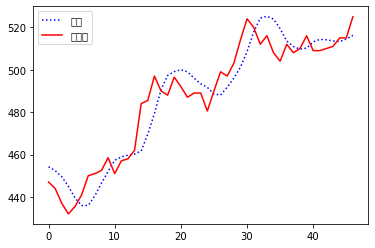

In [5]:
# 主程式
pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告
filename = 'twstockyear2020.csv'
df = pd.read_csv(filename, encoding='big5')  #以pandas讀取檔案
ddprice=pd.DataFrame(df['收盤價'])
    
train_x, train_y, test_x, test_y, scaler, x, y, reshaped_data =load_data(ddprice, sequence_length=10, split=0.8)
# train_x 共 230*0.8=184 筆, test_x 共 230*0.2=46 筆
#print(train_x.shape,train_y.shape) # (184,10,1) (184,1)
#print(test_x.shape,test_y.shape)   # (46,10,1)  (46,1)
predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
predict_y = scaler.inverse_transform([[i] for i in predict_y]) # 還原
test_y = scaler.inverse_transform(test_y)  # 還原

plt.plot(predict_y, 'b:') #預測
plt.plot(test_y, 'r-')    #收盤價
plt.legend(['預測', '收盤價'])
plt.show()

# 建立 DataFrame，加入 predict_y、test_y，準備以 plotly 繪圖
dd2=pd.DataFrame({"predict":list(predict_y),"label":list(test_y)})
#轉換為 numpy 陣列，並轉為 float
dd2["predict"] = np.array(dd2["predict"]).astype('float64')
dd2["label"] = np.array(dd2["label"]).astype('float64')

data = [
    Scatter(y=dd2["predict"],name='預測'),
    Scatter(y=dd2["label"],name='收盤價')
] 



In [6]:
plot({"data": data, "layout": Layout(title='2020年個股預測圖')},auto_open=True)

'temp-plot.html'